In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import img_to_array
from vis.utils import utils
from keras.applications import VGG16
from vis.visualization import visualize_cam

Using TensorFlow backend.


In [2]:
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)
print('Model loaded.')

Model loaded.


In [3]:
# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

In [4]:
# Images corresponding to tiger, penguin, dumbbell, speedboat, spider
image_paths = [
    "http://www.tigerfdn.com/wp-content/uploads/2016/05/How-Much-Does-A-Tiger-Weigh.jpg",
    "http://www.slate.com/content/dam/slate/articles/health_and_science/wild_things/2013/10/131025_WILD_AdeliePenguin.jpg.CROP.promo-mediumlarge.jpg",
    "https://www.kshs.org/cool2/graphics/dumbbell1lg.jpg",
    "http://tampaspeedboatadventures.com/wp-content/uploads/2010/10/DSC07011.jpg",
    "http://ichef-1.bbci.co.uk/news/660/cpsprodpb/1C24/production/_85540270_85540265.jpg"
]

In [5]:
heatmaps = []
for path in image_paths:
    # Predict the corresponding class for use in `visualize_cam`.
    seed_img = utils.load_img(path, target_size=(224, 224))
    pred_class = np.argmax(model.predict(np.array([img_to_array(seed_img)])))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap = visualize_cam(model, layer_idx, [pred_class], seed_img, text=utils.get_imagenet_label(pred_class))
    heatmaps.append(heatmap)

Working on filters: [292]
Working on filters: [145]
Working on filters: [543]
Working on filters: [814]
Working on filters: [815]


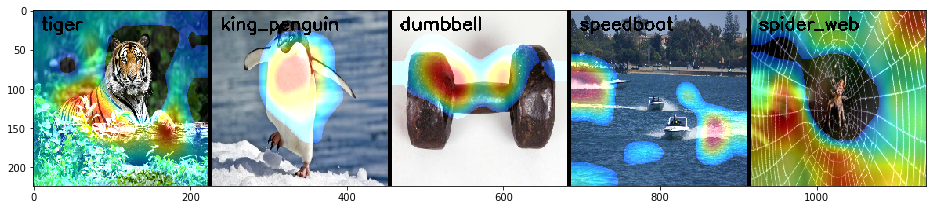

In [6]:
img_data = cv2.cvtColor(utils.stitch_images(heatmaps), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 16))
plt.imshow(img_data)
plt.show()